## Importing libraries and data

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
#importing data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 6\Texas School Nutrition Program Analysis\02 Data'
df = pd.read_csv(os.path.join(path,'Prepared Data', 'SchoolNutritionPrograms20-21_Clean.csv'), index_col=[0]) 

In [4]:
df.shape

(20509, 39)

In [5]:
df.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,COVIDMealSite,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,NO,...,0,19,0.00,0.00,263.0,263.00,250,100.000000,0.000000,0.000000
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,NO,...,930,0,6436.46,29107.95,0.0,35544.41,922,89.168279,59.291103,830.077369
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,NO,...,554,14,3522.97,17362.51,45.0,20930.48,444,89.156627,73.421687,1027.911647
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,NO,...,435,14,2103.31,13616.40,32.0,15751.71,436,89.161554,58.648262,821.063395
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,NO,...,269,0,5449.41,8409.61,0.0,13859.02,201,89.333333,78.728889,1102.222222


## Cleaning data

### Removing outliers

In [6]:
#checking lower and upper limits
Q1=df['TotalFreeRedcEligQty'].quantile(0.25)
Q3=df['TotalFreeRedcEligQty'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
98.0
98.0
-147.0 245.0


In [7]:
#creating new df with outliers removed
df_NoOutliers = df[df['TotalFreeRedcEligQty']< Upper_Whisker]

In [8]:
df_NoOutliers.shape

(17012, 39)

### Removing categorical columns

In [9]:
df_NoOutliers.columns

Index(['ReportType', 'CEID', 'CEName', 'TypeOfAgency', 'TypeOfOrg', 'ESC',
       'TDARegion', 'SiteID', 'SiteName', 'COVIDMealSite',
       'CountyDistrictCode', 'CECounty', 'SiteCounty', 'ClaimDate',
       'EnrollmentQty', 'FreeEligQty', 'RedcEligQty', 'PaidEligQty',
       'BreakfastDays', 'BreakfastTotal', 'BreakfastADP',
       'BreakfastServedFree', 'BreakfastServedRedc', 'BreakfastServedPaid',
       'LunchDays', 'LunchTotal', 'LunchADP', 'LunchServedFree',
       'LunchServedRedc', 'LunchServedPaid', 'SnackDays',
       'BreakfastReimbursement', 'LunchReimbursement', 'SnackReimbursement',
       'TotalReimbursement', 'TotalFreeRedcEligQty', 'Normalized_FreeRedcElig',
       'Normalized_LunchADP', 'Normalized_LunchTotal'],
      dtype='object')

In [10]:
# creating data with only relevant quantitative columns
new_df = df_NoOutliers[['Normalized_LunchADP', 'Normalized_FreeRedcElig', 'Normalized_LunchTotal']]

In [11]:
new_df.shape

(17012, 3)

### Removing NaNs

In [12]:
df_nona = new_df[new_df['Normalized_LunchADP'].notna()]
df_nona = new_df[new_df['Normalized_FreeRedcElig'].notna()]
df_nona = new_df[new_df['Normalized_LunchTotal'].notna()]


In [13]:
df_nona

,Normalized_LunchADP,Normalized_FreeRedcElig,Normalized_LunchTotal
4,78.728889,89.333333,1102.222222
9,67.241379,94.088670,672.413793
10,34.289216,94.117647,685.784314
15,0.000000,0.000000,0.000000
16,0.000000,0.000000,0.000000
...,...,...,...
20493,62.692308,100.000000,1253.846154
20494,60.738255,100.000000,1093.288591
20495,57.788079,100.000000,1098.013245
20496,0.000000,0.000000,0.000000


## The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_nona).score(df_nona) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3669919989.3792205,
 -931436750.2645217,
 -279953430.5022223,
 -122870043.91782273,
 -77986281.896432,
 -57385125.21468812,
 -41785537.57302331,
 -32897805.22100782,
 -27095507.463027507]

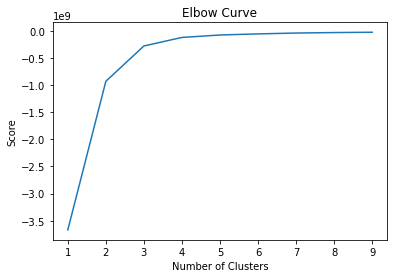

In [16]:
# Plotting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters is 3. After 3, the curve only rises slightly

## K-means clustering

In [17]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fitting the k-means object to the data
kmeans.fit(df_nona)

KMeans(n_clusters=3)

In [19]:
#Attaching a new column to your dataframe with the resulting clusters
df_nona['clusters'] = kmeans.fit_predict(df_nona)

C:\Users\Admin\AppData\Local\Temp\ipykernel_31456\1055536906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['clusters'] = kmeans.fit_predict(df_nona)


In [20]:
df_nona.head()

,Normalized_LunchADP,Normalized_FreeRedcElig,Normalized_LunchTotal,clusters
4,78.728889,89.333333,1102.222222,2
9,67.241379,94.088670,672.413793,2
10,34.289216,94.117647,685.784314,2
15,0.000000,0.000000,0.000000,0
16,0.000000,0.000000,0.000000,0


In [21]:
df_nona['clusters'].value_counts()

0    2774
2    1510
1     492
Name: clusters, dtype: int64

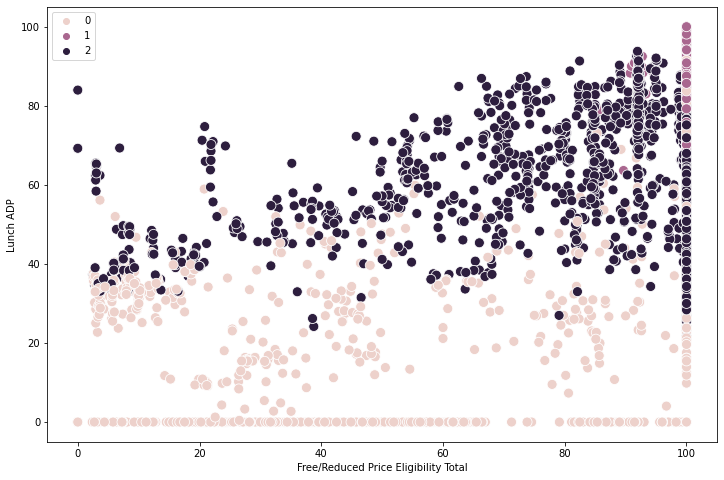

In [22]:
# plotting the clusters for FreeRedcElig and Lunch ADP
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nona['Normalized_FreeRedcElig'], y=df_nona['Normalized_LunchADP'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Free/Reduced Price Eligibility Total') 
plt.ylabel('Lunch ADP')
plt.show()

The purple cluster represents the schools with the lowest Lunch ADP. The free/reduced price total for these schools spans from 0-100%. The pink cluster shows the points with a medium lunch ADP. The dark purple clusters contains points with the highest total free/reduced eligibility total and the highest lunch ADP. The purple cluster shows that most of the points with high free/reduced price eligibility totals also have higher lunch ADP.

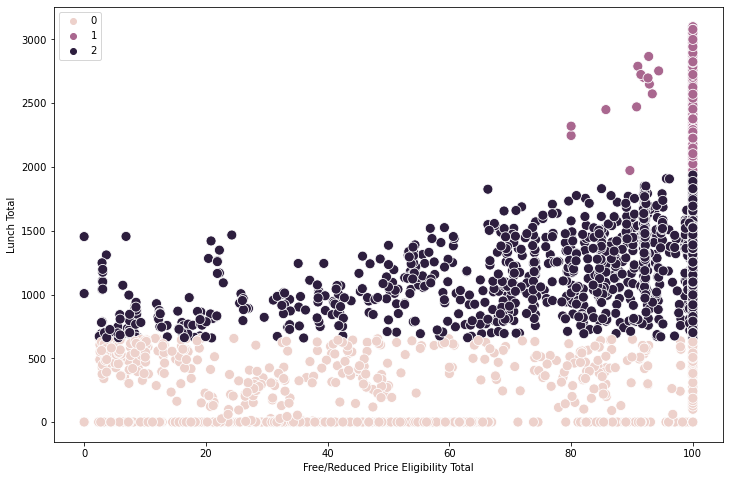

In [31]:
# plotting the clusters for FreeRedcElig and Total lunch participation
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nona['Normalized_FreeRedcElig'], y=df_nona['Normalized_LunchTotal'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Free/Reduced Price Eligibility Total') 
plt.ylabel('Lunch Total')
plt.show()

This scatterplot shows a similar pattern to the previous one, but it is cleaner. Again, the purple cluster shows that the points with lower lunch totals are spread across all free/reduce price eligibility totals. The pink cluster shows that the points that have a middle-ground total lunch participation tend to have higher free/reduced price eligibility totals. The smallest cluster is the cluster with high free/reduced price eligibility totals and high lunch totals.
90  

In [24]:
#calculating descriptive statistics
df_nona.groupby('clusters').agg({'Normalized_LunchADP':['mean', 'median'], 
                         'Normalized_FreeRedcElig':['mean', 'median'], 
                         'Normalized_LunchTotal':['mean', 'median']})

Normalized_LunchADP            Normalized_FreeRedcElig              \
                        mean     median                    mean      median   
clusters                                                                      
0                   5.642088   0.000000               18.845892    0.000000   
1                  86.799093  88.505093               99.728518  100.000000   
2                  64.485383  66.250518               82.856315   92.784847   

         Normalized_LunchTotal               
                          mean       median  
clusters                                     
0                    73.103382     0.000000  
1                  2640.036569  2694.621168  
2                  1238.388028  1248.435322

In the three clusters, the mean and median  of total lunches served and Lunch ADP goes up with the mean and median of free/reduced eligibility price eligibility totals.

For future analyses, these results tell me to look more closely at Lunch Totals rather than Lunch ADP. It seems like these points paint a more cohesive picture. I would also like to look at organizations with Free/Reduced Price Eligibility totals at 60% or higher, since there seems to be a dense cluster here. 

## Exporting data

In [25]:
#exporting data with cluster column for visualization in tableau
df_nona.to_csv(os.path.join(path,'DataWithClusterColumn.csv'))